In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
df2=pd.read_csv('Food_Establishment_Inspection_Data.csv')
df2.head(2)

/tmp/ipykernel_2479/2491600647.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df2=pd.read_csv('Food_Establishment_Inspection_Data.csv')


,Name,Program Identifier,Inspection Date,Description,Address,City,Zip Code,Phone,Longitude,Latitude,...,Inspection Score,Inspection Result,Inspection Closed Business,Violation Type,Violation Description,Violation Points,Business_ID,Inspection_Serial_Num,Violation_Record_ID,Grade
0,#807 TUTTA BELLA,#807 TUTTA BELLA,08/31/2022,Seating 0-12 - Risk Category III,2746 NE 45TH ST,SEATTLE,98105,(206) 722-6400,-122.296415,47.662311,...,10.0,Unsatisfactory,False,BLUE,"3200 - Insects, rodents, animals not present; ...",5,PR0089260,DAEEWQC0L,IVQ7QYW2V,1.0
1,#807 TUTTA BELLA,#807 TUTTA BELLA,08/31/2022,Seating 0-12 - Risk Category III,2746 NE 45TH ST,SEATTLE,98105,(206) 722-6400,-122.296415,47.662311,...,10.0,Unsatisfactory,False,RED,0200 - Food Worker Cards current for all food ...,5,PR0089260,DAEEWQC0L,IV0J437H6,1.0


In [7]:
df=df2.loc[:, ['Inspection Score','Inspection Result','Violation Description' , 'Violation Points']]
# len(pd.unique(df['Violation Description']))
df.dropna(inplace=True)

df.head(2)

,Inspection Score,Inspection Result,Violation Description,Violation Points
0,10.0,Unsatisfactory,"3200 - Insects, rodents, animals not present; ...",5
1,10.0,Unsatisfactory,0200 - Food Worker Cards current for all food ...,5


In [10]:
# dfe = df.explode('Violation Description')
# df['Violation Description']=df['Violation Description'].map(str)
df = df.astype({'Violation Description':'string'})

df['code']=df['Violation Description'].apply(lambda x: x[0:4])
df.info()
df.dropna(inplace=True)
# print(df.sort_values(by='code'))
# print(df.isna())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139128 entries, 0 to 250757
Data columns (total 5 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Inspection Score       139128 non-null  float64
 1   Inspection Result      139128 non-null  object 
 2   Violation Description  139128 non-null  string 
 3   Violation Points       139128 non-null  int64  
 4   code                   139128 non-null  object 
dtypes: float64(1), int64(1), object(2), string(1)
memory usage: 6.4+ MB


In [11]:
# df3=df.groupby(by='Violation Description',as_index=False).size().sort_values(by='size', ascending=False)
# df3
df['code'].isna().sum()

0



<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=4>
		<font color=blue size=5>
           بررسی بیشترین دلایل مشکلات بازرسی
            </font>
        <br/>
        <font>
            بررسی بیشترین مشکلات اعلام شده در بازرسیها موارد زیر را نشان میدهد:
            دمای مناسب 
            شست و شوی دست
            تمیز بودن لباسها
            نصب مناسب شیرها 
                         
</div>

In [29]:
df2=df.groupby(by=['code','Violation Description'],as_index=False,dropna=False).size().sort_values(by='size', ascending=False)
df3=df2.head(10)
print(df3)

    code                              Violation Description   size
41  2110  2110 - Proper cold holding temperatures (great...  12095
12  0600             0600 - Adequate handwashing facilities  10320
68  3400  3400 - Wiping cloths properly used, stored, pr...   8614
80  4100  4100 - Warewashing facilities properly install...   6977
42  2120  2120 - Proper cold holding temperatures ( 42 d...   6268
81  4200  4200 - Food-contact surfaces maintained, clean...   6262
65  3300  3300 - Potential food contamination prevented ...   4946
4   0200  0200 - Food Worker Cards current for all food ...   4867
82  4300  4300 - Non-food contact surfaces maintained an...   4277
31  1600                    1600 - Proper cooling procedure   3739


Text(0.5, 1.0, '10 most occured Violation Description')

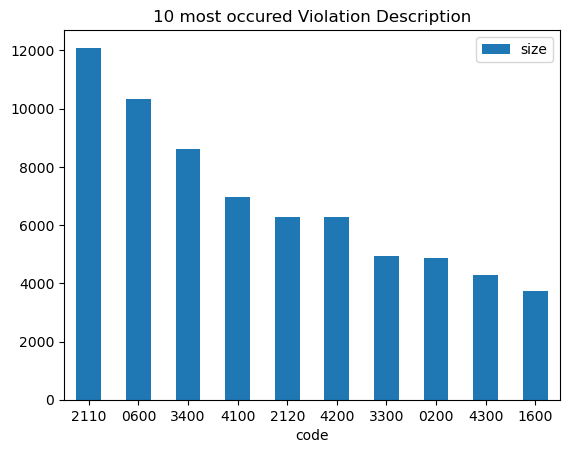

In [31]:
ax = df3.plot.bar(x='code', y='size', rot=0)
plt.title('10 most occured Violation Description')